In [1]:
import cv2 #import OpenCV
from matplotlib import pyplot as plt #import python plot graph
import matplotlib as mpl #import math library from python
import numpy as np

In [2]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)

In [3]:
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

In [4]:
def display_image_actual_size_double(im_data1,im_data2):
    # assuming that the two input images have the same dimension and shape
    # then, we calculate figsize from one of the two images
    figuresize = get_figsize(im_data1)
    # Create a figure of the right size that can accommodate two images side-by-side
    fig = plt.figure(figsize=(figuresize[0],figuresize[1]*2+.1))
    ax1 = fig.add_axes([0,0,1,1])
    ax1.imshow(im_data1, cmap='gray')
    ax1.axis('off')
    ax2 = fig.add_axes([1.1,0,1,1])
    ax2.imshow(im_data2, cmap='gray')
    ax2.axis('off')
    return(fig)

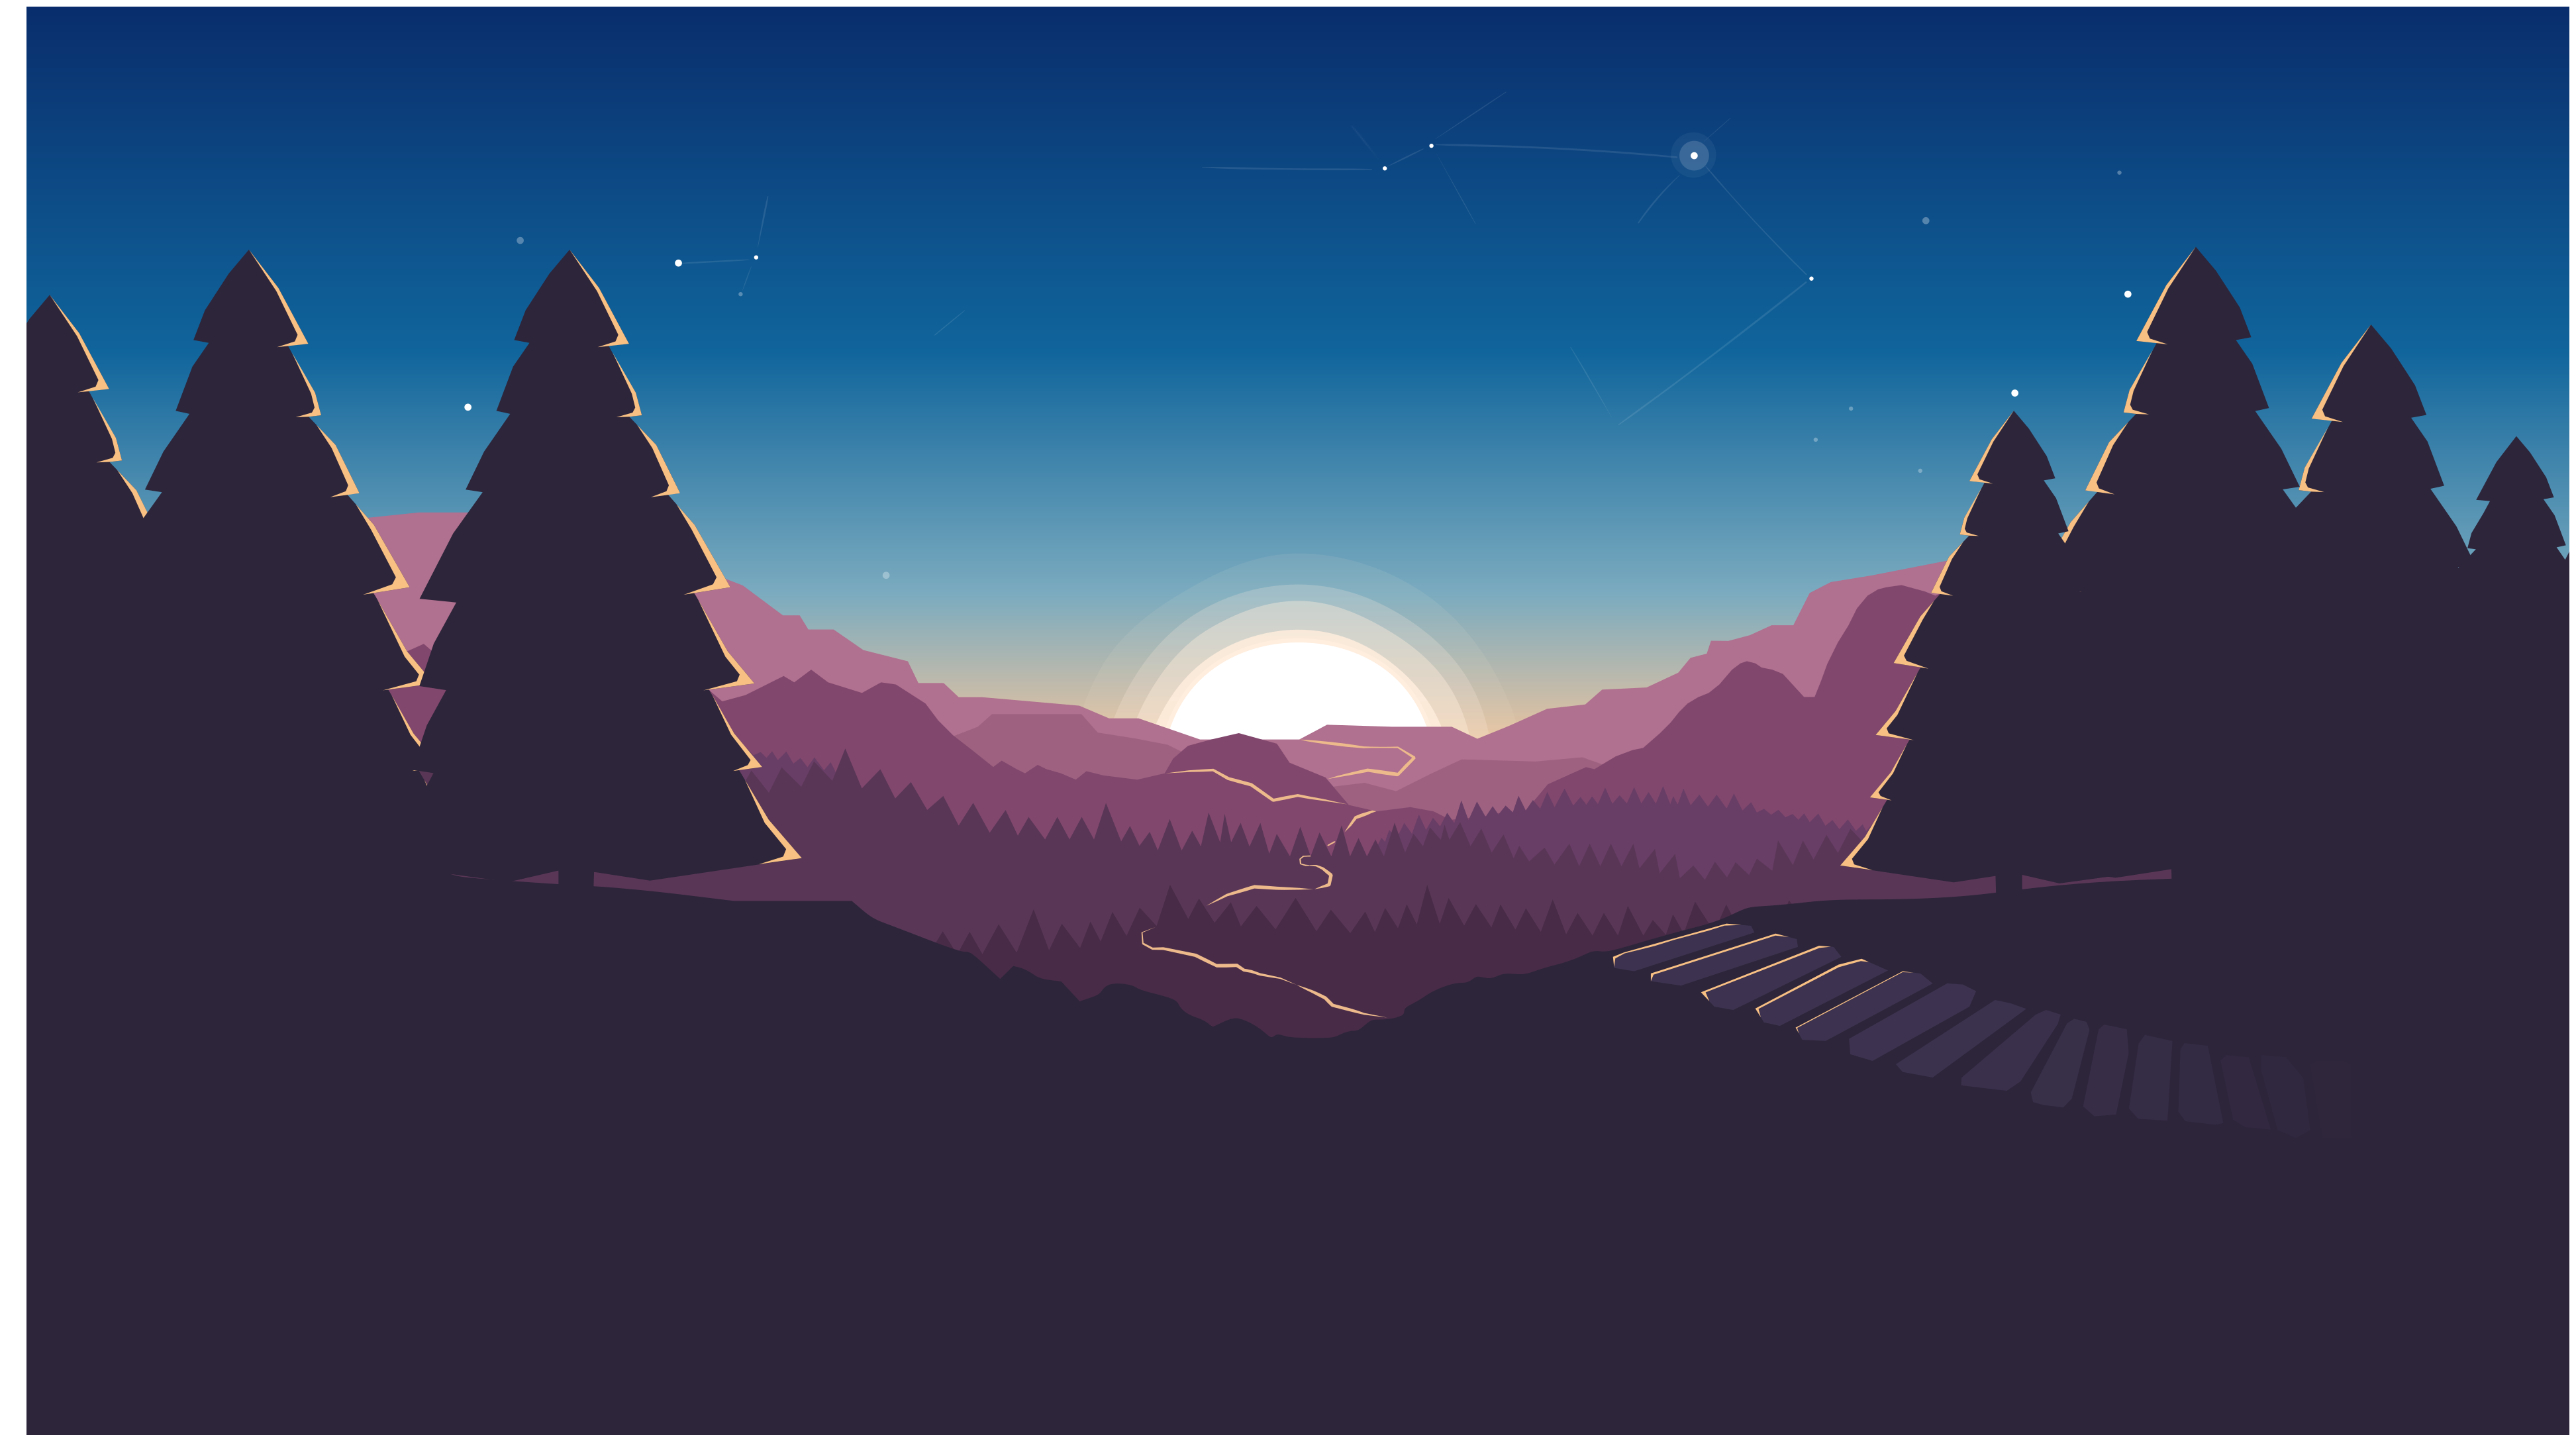

(2157, 3840, 3)


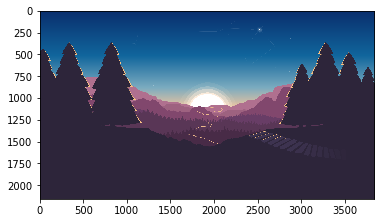

In [84]:
bg = cv2.imread('bg.jpg')
bg = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
fig = display_image_actual_size_single(bg)
plt.imshow(bg)
print(bg.shape)

(700, 700, 3)


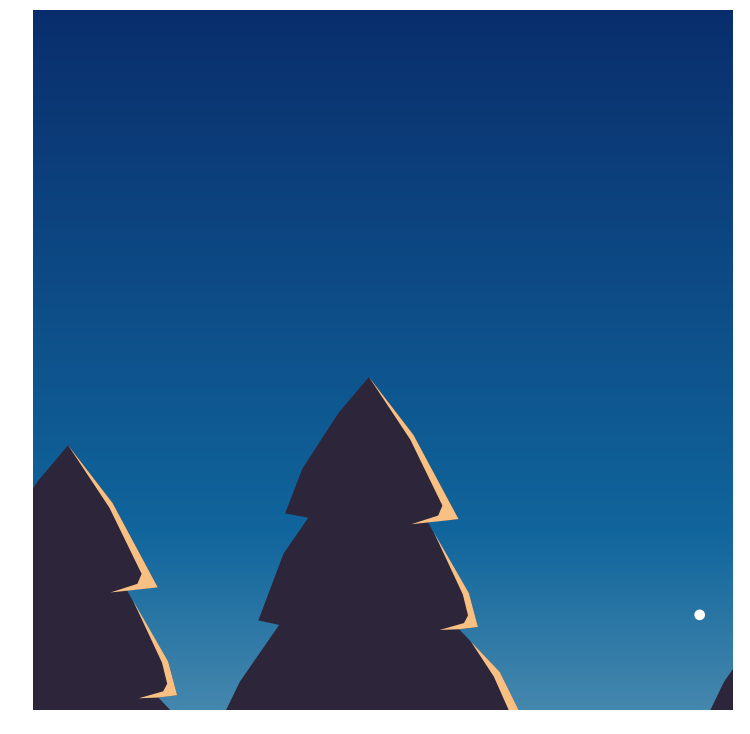

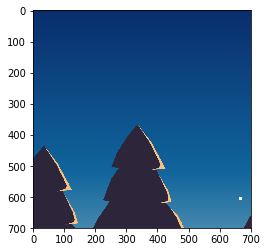

In [85]:
# margin more 50 px
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi = bg[0:700, 0:700]  #cut from bg the roi of the same dimesions as fg
print(roi.shape)
fig = display_image_actual_size_single(roi)
plt.imshow(roi)

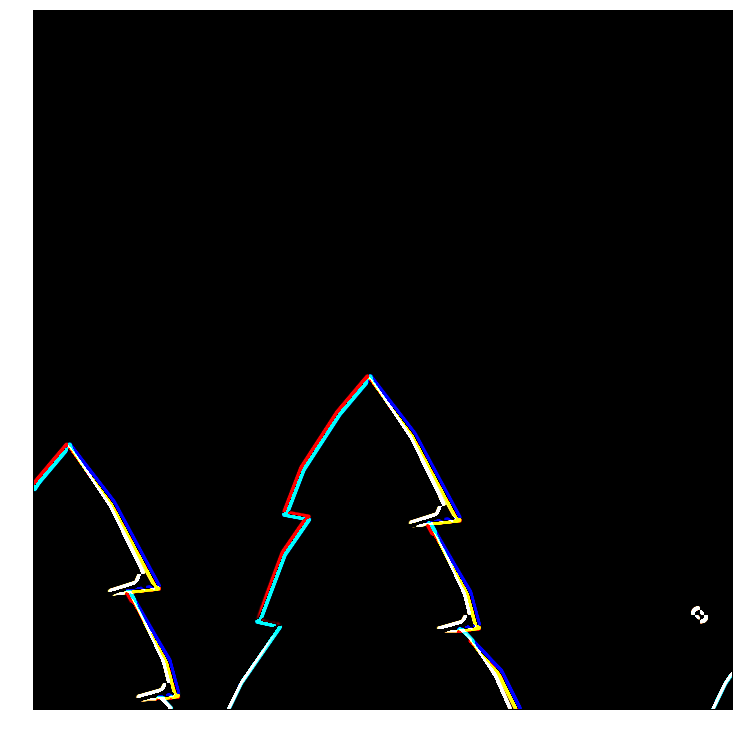

In [86]:
sobeledgeHV = cv2.Sobel(roi, -1, 1, 1, ksize=7)   #vertical edges, changes in the x direction
fig = display_image_actual_size_single(sobeledgeHV)

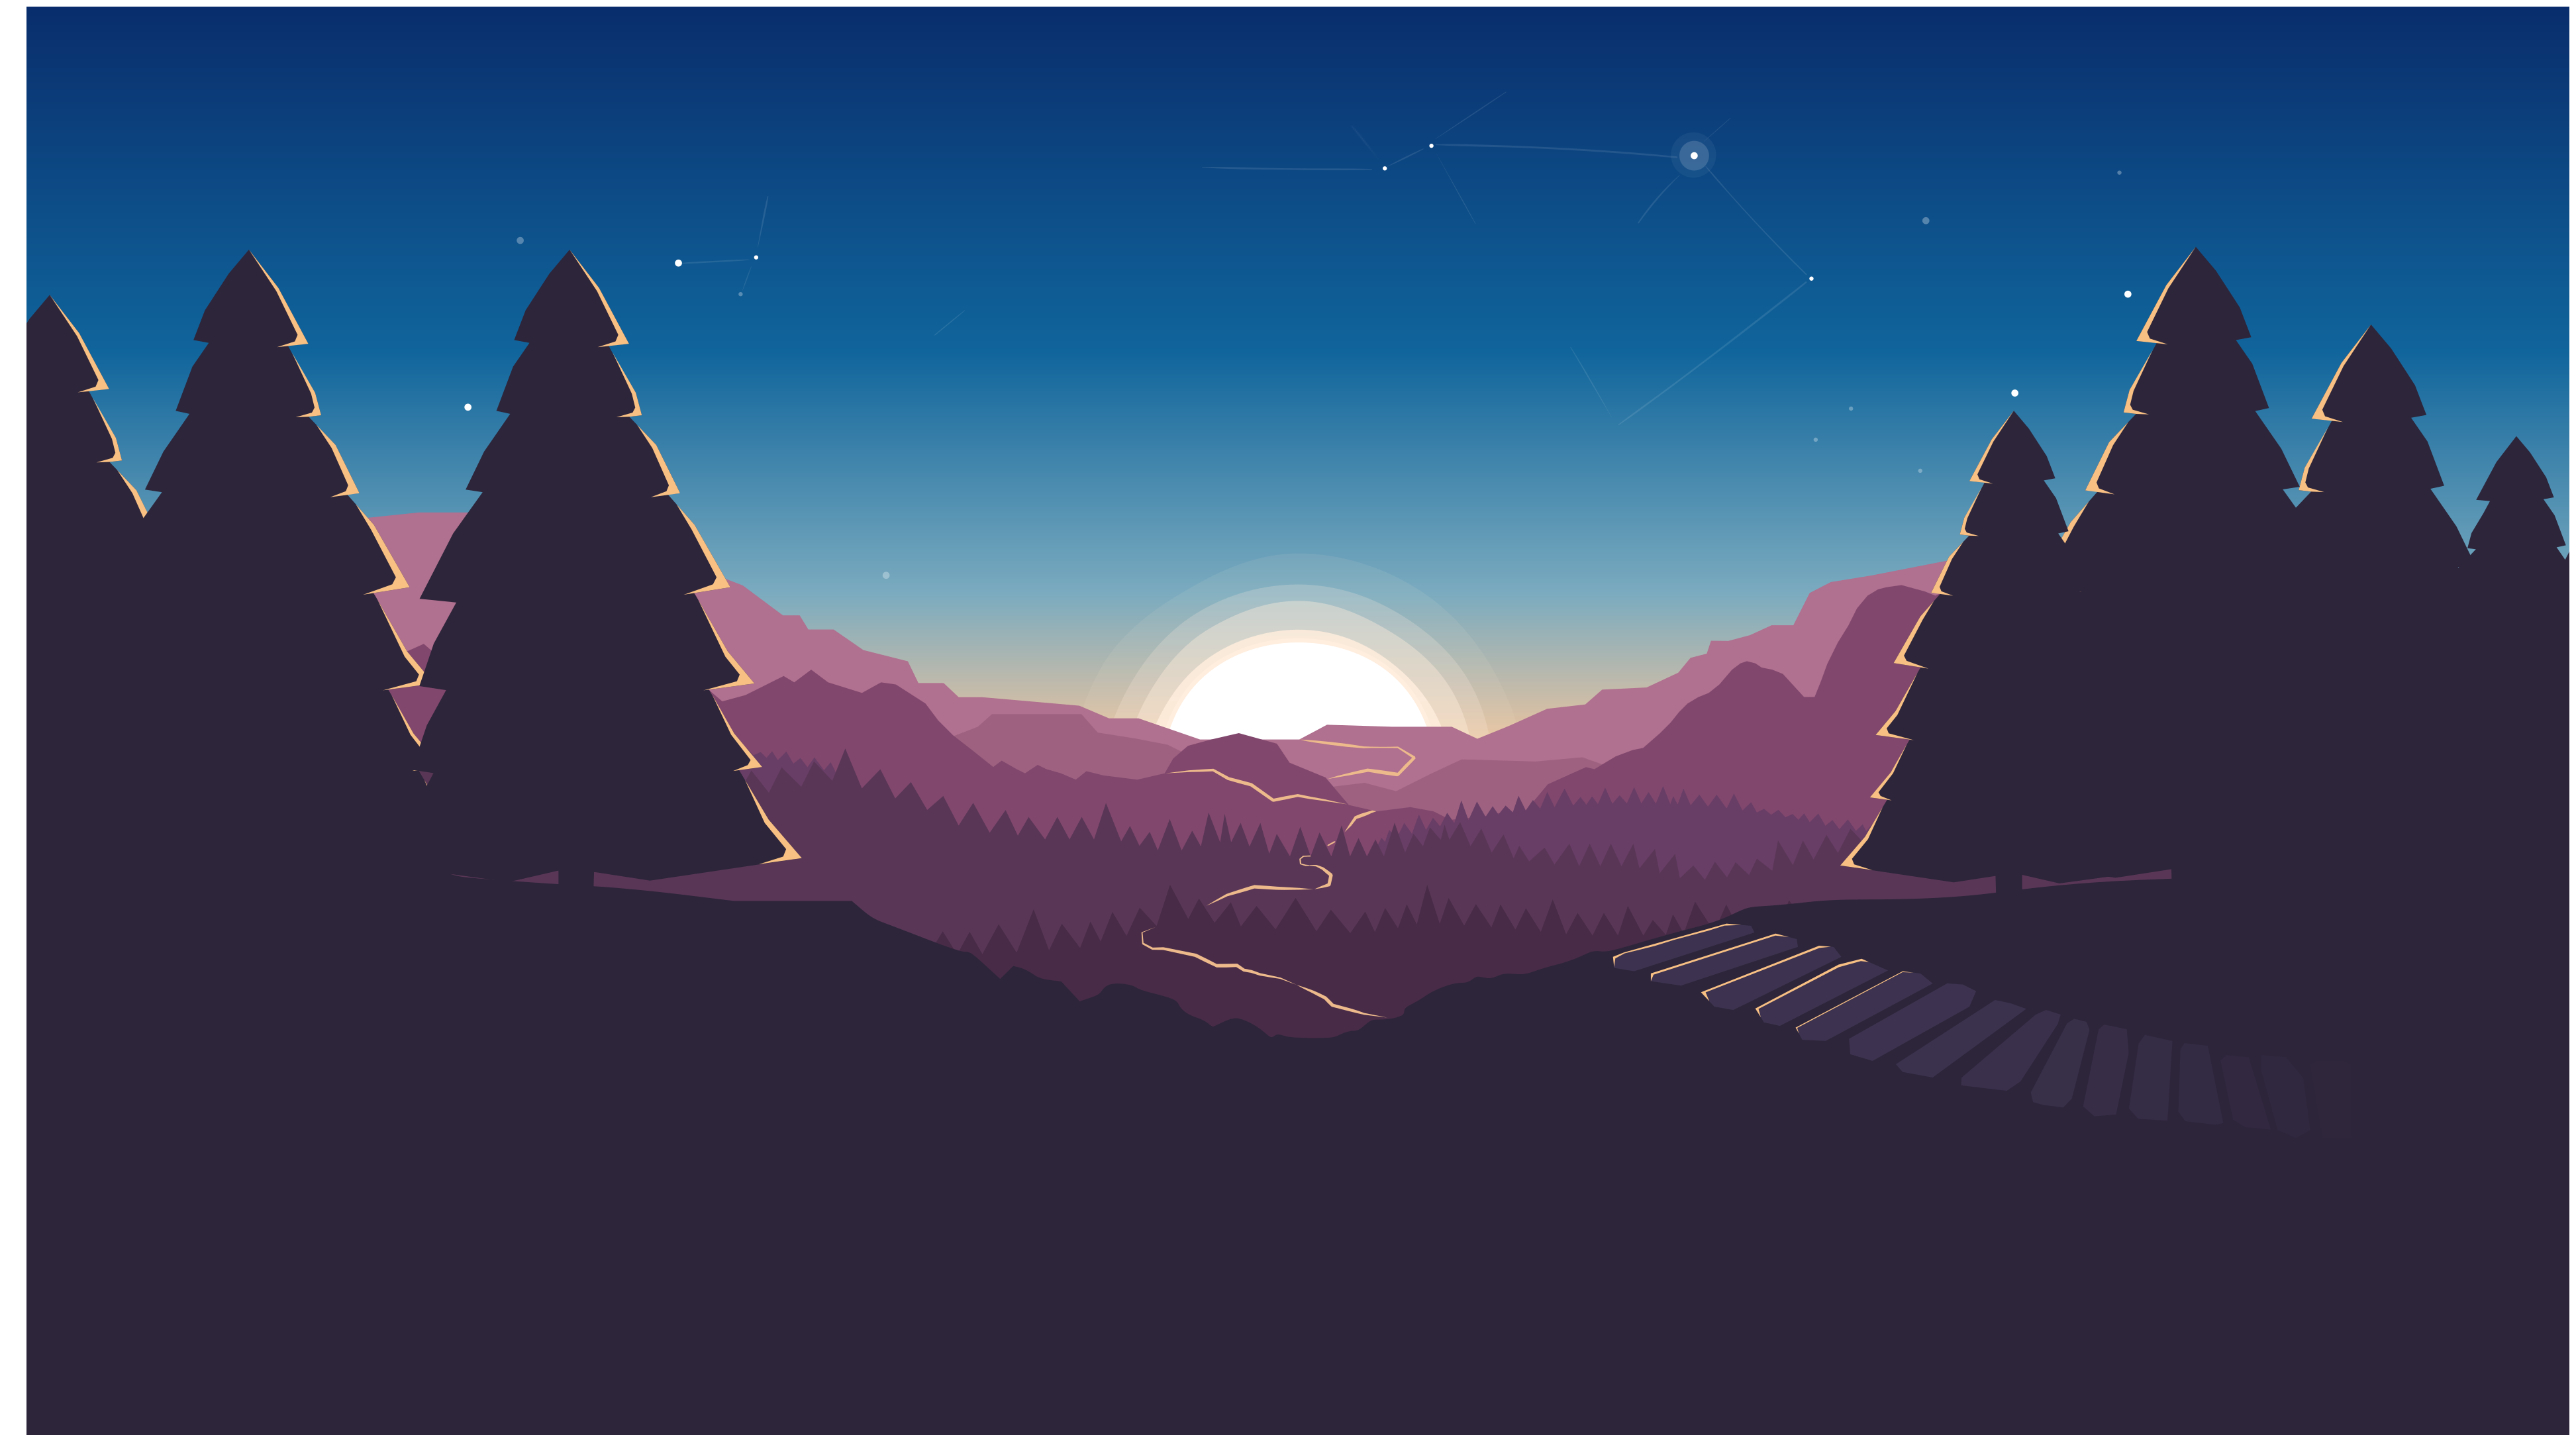

In [87]:

fig = display_image_actual_size_single(bg)

(700, 700, 3)


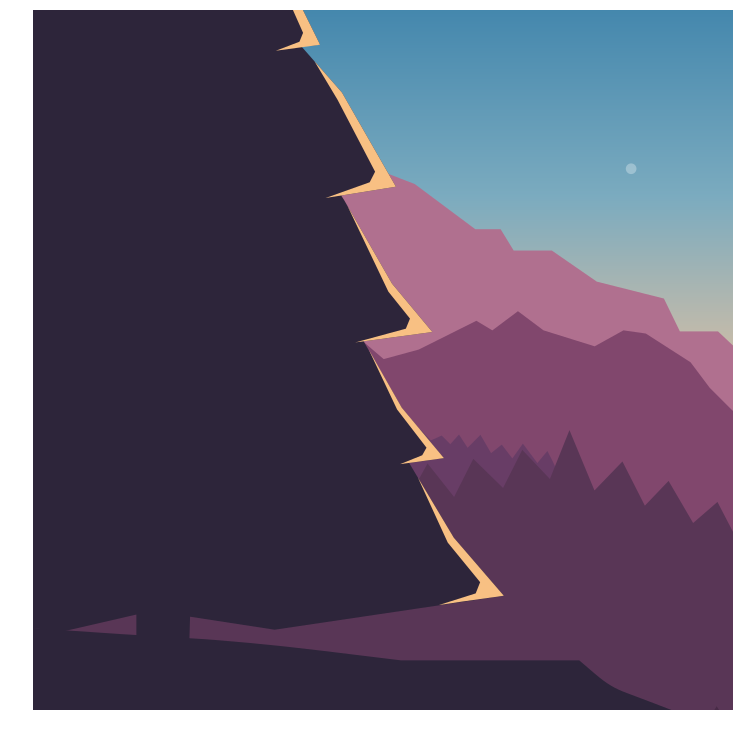

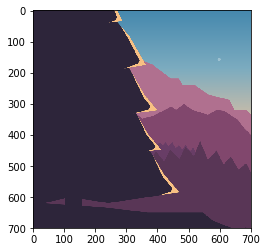

In [88]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi1 = bg[700:1400, 700:1400]  #cut from bg the roi of the same dimesions as fg
print(roi.shape)
fig = display_image_actual_size_single(roi1)
plt.imshow(roi1)

(700, 700, 3)


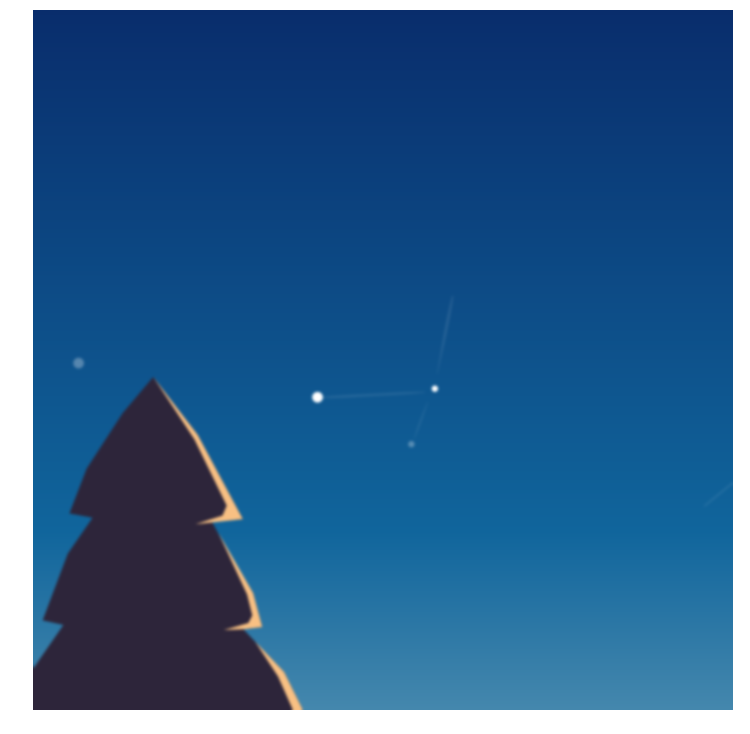

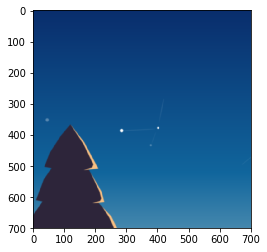

In [99]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi3 = bg[0:700, 700:1400]  #cut from bg the roi of the same dimesions as fg
BlurGauss = cv2.GaussianBlur(roi3, (15,15), 0)
print(roi3.shape)
fig = display_image_actual_size_single(roi3)
plt.imshow(roi3)

(700, 700, 3)


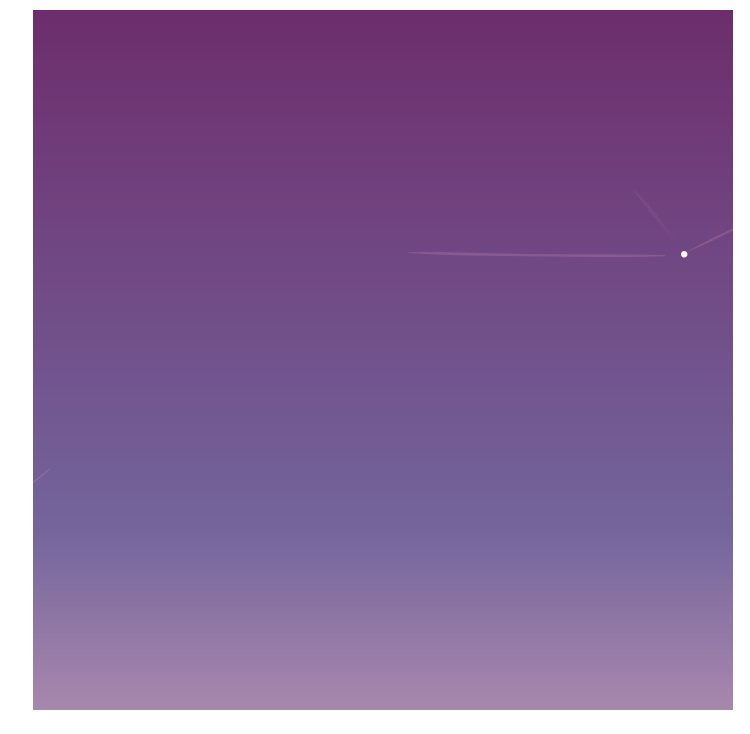

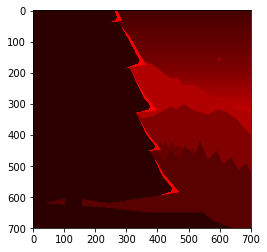

In [90]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi4 = bg[0:700, 1400:2100]  #cut from bg the roi of the same dimesions as fg
brighter2 = cv2.add(roi4,100)    
print(roi4.shape)
fig = display_image_actual_size_single(brighter2)
plt.imshow(negative)

In [101]:
def saltpepper_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

(700, 700, 3)


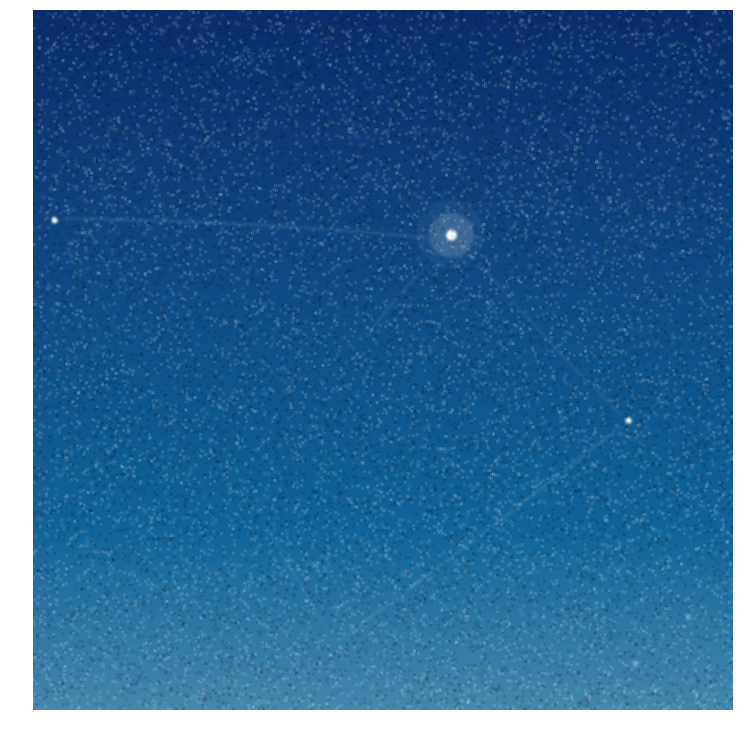

In [108]:
# GaussianBlur on S&P Filter
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi5 = bg[0:700, 2100:2800]  #cut from bg the roi of the same dimesions as fg
imSP1 = saltpepper_noise(roi5,0.0125)         #Add noise, 'prob' controls how much noise is added
BlurGauss2 = cv2.GaussianBlur(imSP1, (15,15), 0)
print(blurBox3.shape)
fig = display_image_actual_size_single(blurBox3)

(700, 700, 3)


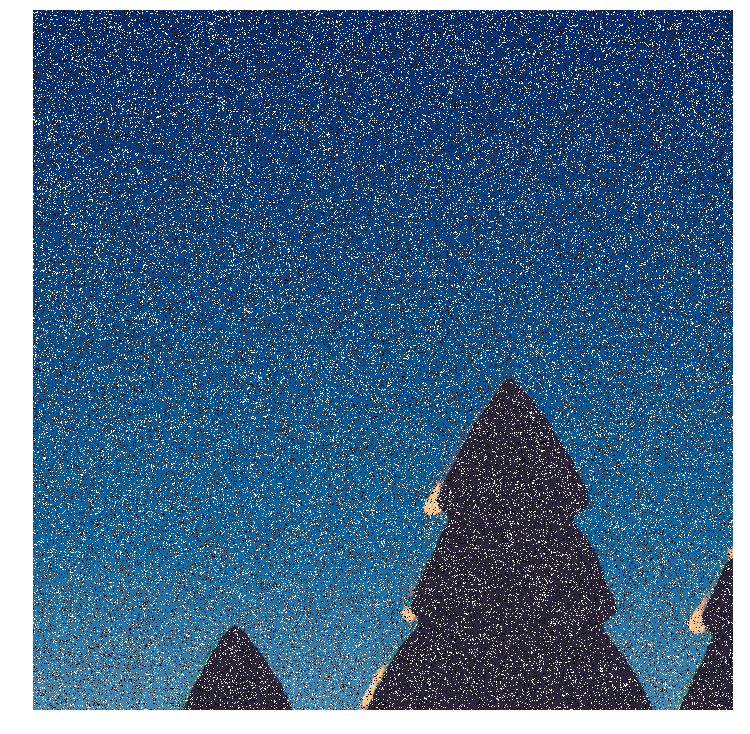

In [122]:
# Median Filter on S&P
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi5 = bg[0:700, 2800:3500]
imSP2 = saltpepper_noise(roi5,0.09)  
medianFilteredimSP = cv2.medianBlur(imSP2,1)   #Apply a median filter to of size ‘sz’
print(medianFilteredimSP.shape)
fig = display_image_actual_size_single(medianFilteredimSP)

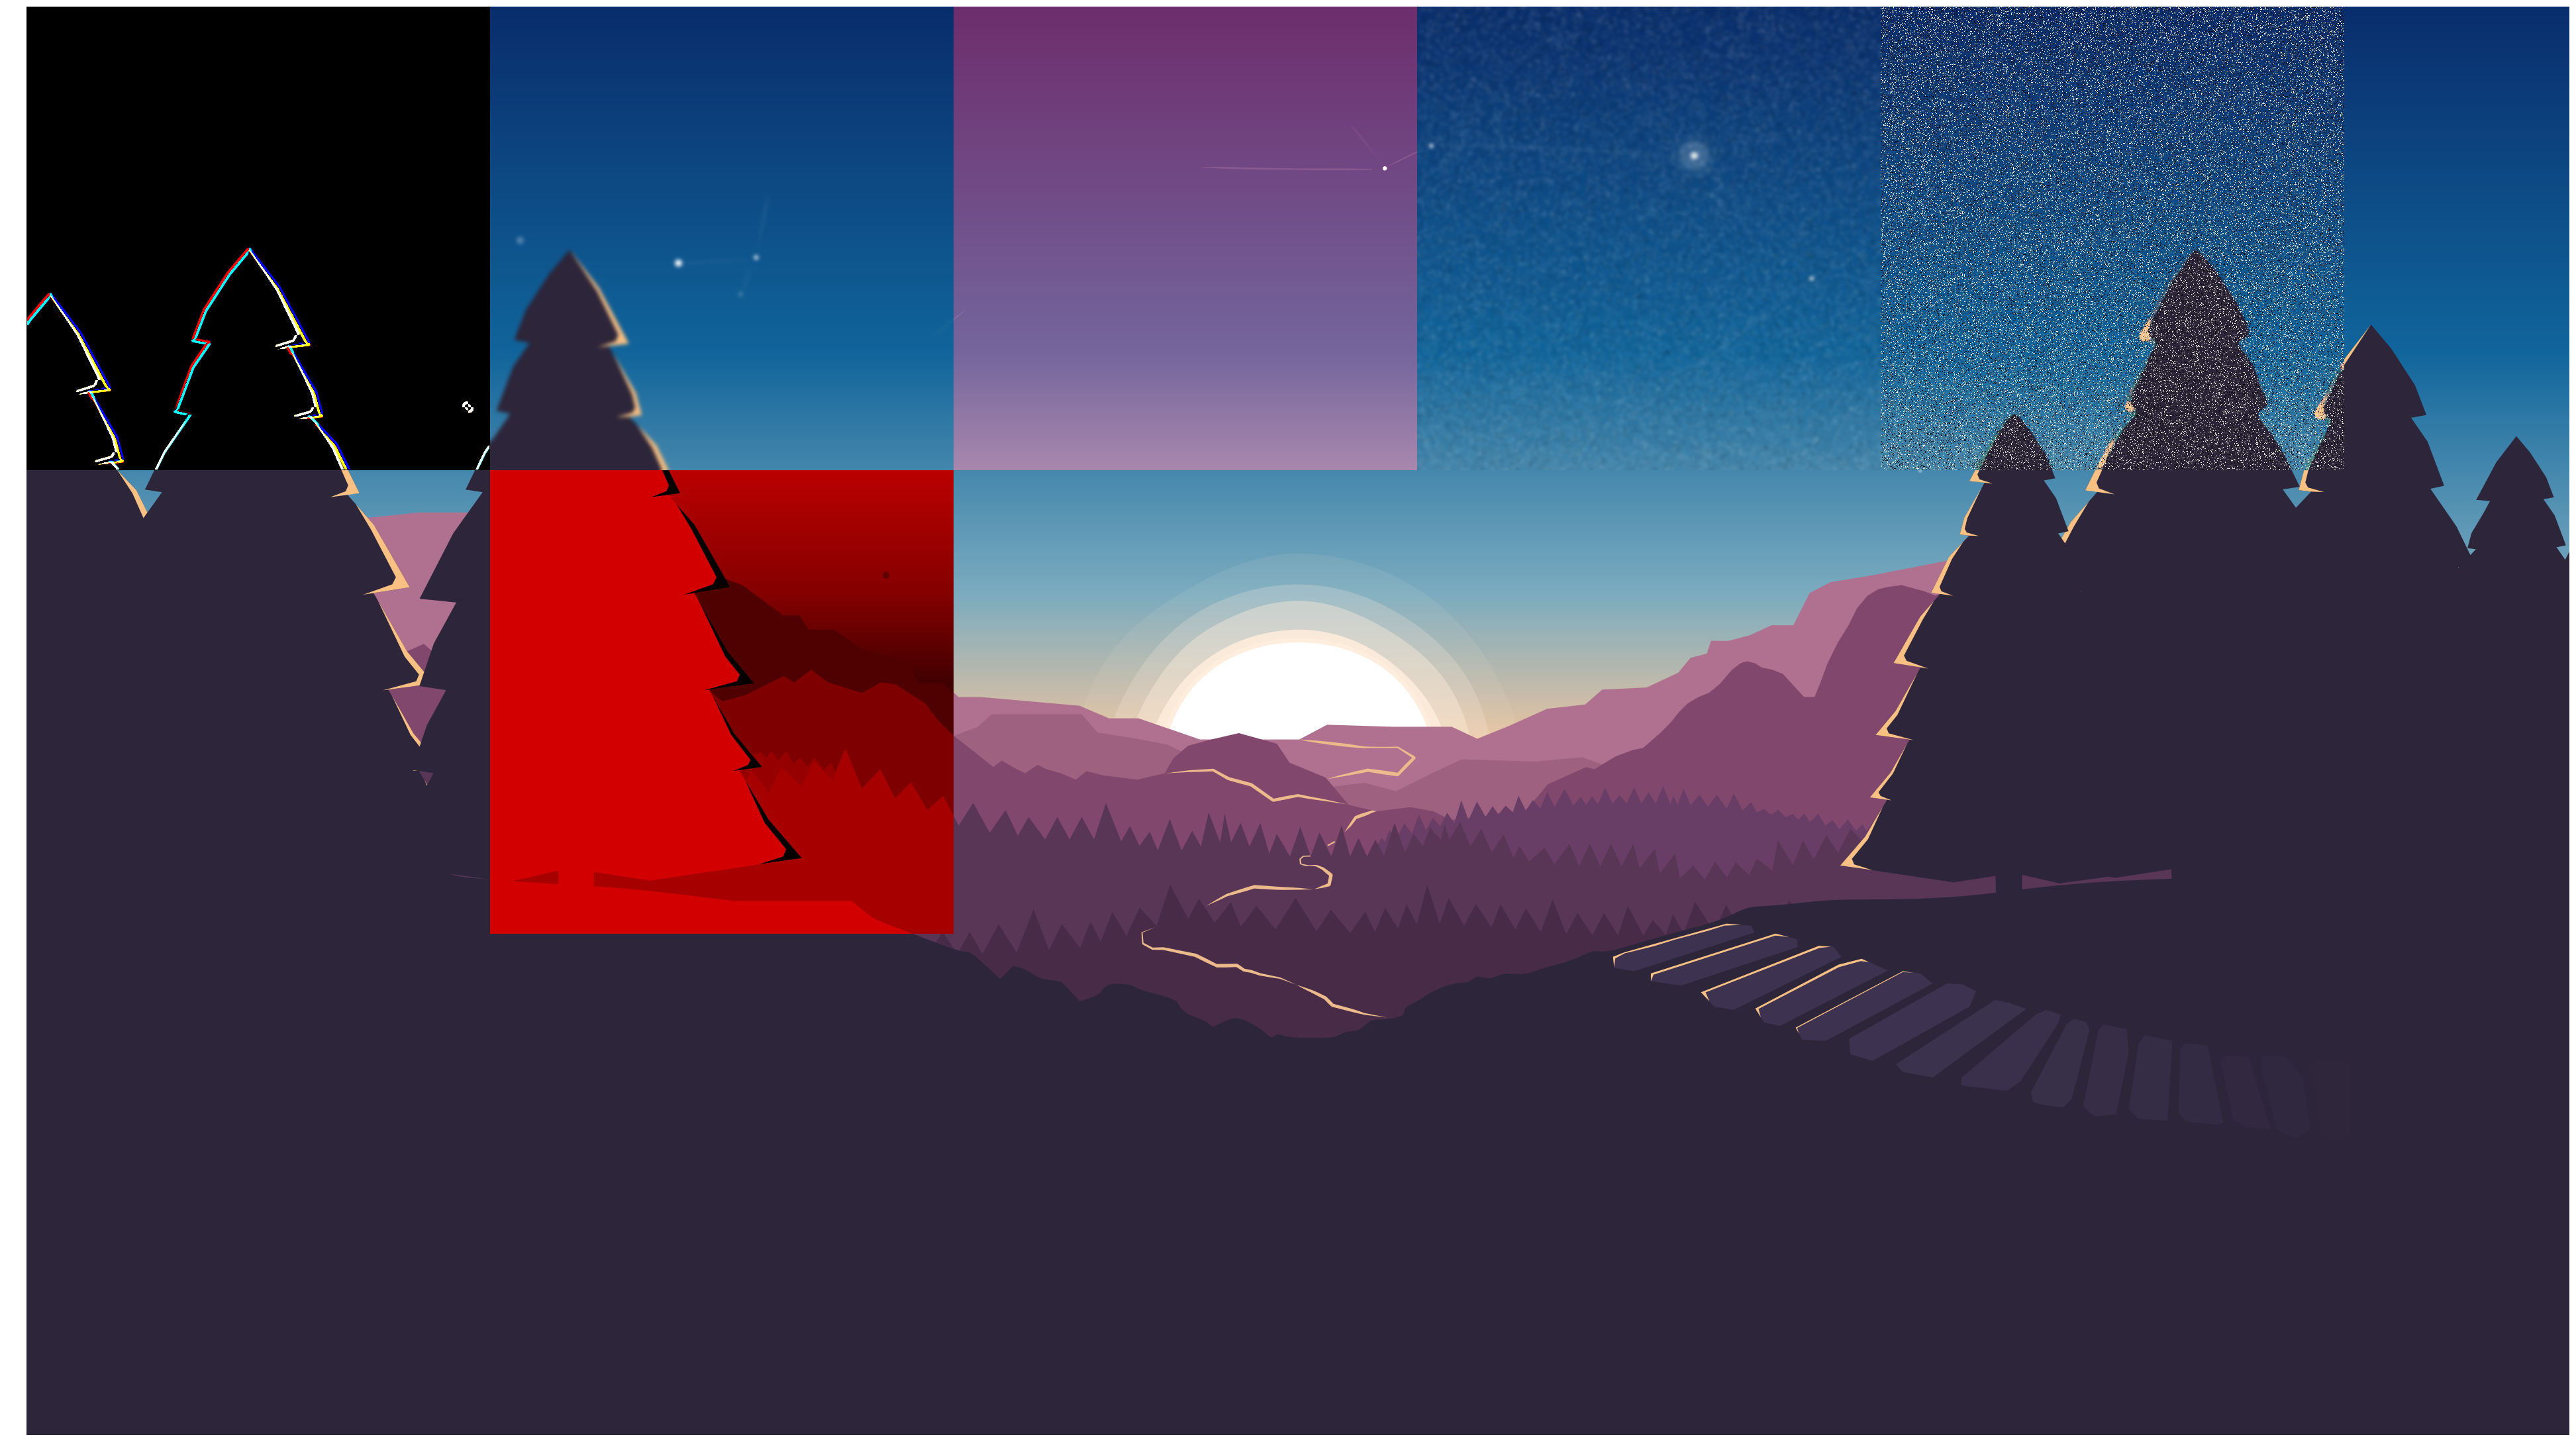

In [123]:
dst =sobeledgeHV
bg[0:700,  0:700 ] = dst
negative = cv2.subtract(255,roi1) 
dst1 =negative
bg[700:1400,  700:1400 ] = dst1
dst2 = BlurGauss
bg[0:700, 700:1400] = dst2  #cut from bg the roi of the same dimesions as fg
dst3 = brighter2
bg[0:700, 1400:2100] = dst3
dst4 = BlurGauss2
bg[0:700, 2100:2800]  = dst4
dst5 = medianFilteredimSP
bg[0:700, 2800:3500] = dst5
fig = display_image_actual_size_single(bg)